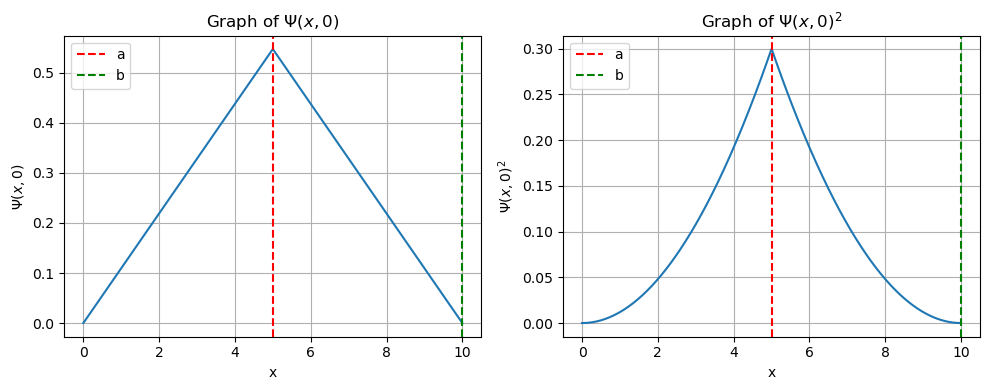

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x, a, b):
    if 0 <= x <= a:
        return np.sqrt(3/b) * x/a
    elif a <= x <= b:
        return np.sqrt(3/b) * (b-x)/(b-a)
    else:
        return 0

def psi_squared(x, a, b):
    if 0 <= x <= a:
        return (np.sqrt(3/b) * x/a) ** 2
    elif a <= x <= b:
        return (np.sqrt(3/b) * (b-x)/(b-a)) ** 2
    else:
        return 0

a = 5  # replace with the desired value of 'a'
b = 10  # replace with the desired value of 'b'

x = np.linspace(0, b, 1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Psi(x, 0)
axs[0].plot(x, np.array([psi(xi, a, b) for xi in x]))
axs[0].axvline(x=a, color='r', linestyle='--', label='a')
axs[0].axvline(x=b, color='g', linestyle='--', label='b')
axs[0].set_xlabel('x')
axs[0].set_ylabel(r'$\Psi(x, 0)$')
axs[0].set_title(r'Graph of $\Psi(x, 0)$')
axs[0].grid(True)
axs[0].legend()

# Plot Psi(x, 0)^2
axs[1].plot(x, np.array([psi_squared(xi, a, b) for xi in x]))
axs[1].axvline(x=a, color='r', linestyle='--', label='a')
axs[1].axvline(x=b, color='g', linestyle='--', label='b')
axs[1].set_xlabel('x')
axs[1].set_ylabel(r'$\Psi(x, 0)^2$')
axs[1].set_title(r'Graph of $\Psi(x, 0)^2$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.savefig('1_4_1.png')
plt.show()


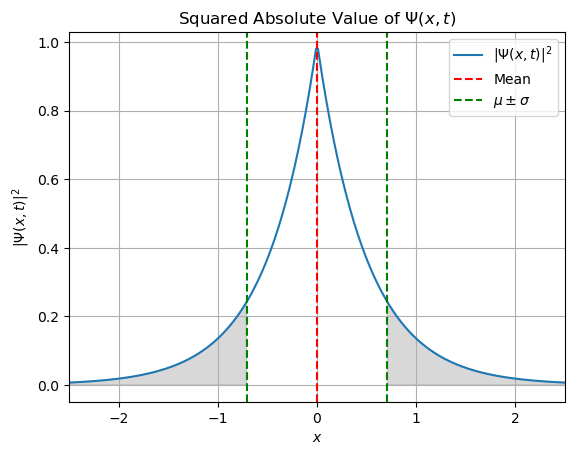

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def psi_squared(x, t, lam, omega):
    return lam * np.exp(-lam * np.abs(x))**2

lam = 1.0  # replace with the desired value of lambda
omega = 2.0  # replace with the desired value of omega
t = 1.0  # replace with the desired value of t

x = np.linspace(-10, 10, 1000)
y = np.array([psi_squared(xi, t, lam, omega) for xi in x])

mean = np.trapz(x * y, x) / np.trapz(y, x)
std_dev = np.sqrt(np.trapz((x - mean)**2 * y, x) / np.trapz(y, x))
lower_bound = mean - std_dev
upper_bound = mean + std_dev

fig, ax = plt.subplots()
ax.plot(x, y, label=r'$|\Psi(x, t)|^2$')
ax.fill_between(x, 0, y, where=(x < lower_bound) | (x > upper_bound), color='gray', alpha=0.3)
ax.axvline(mean, color='r', linestyle='--', label=r'Mean')
ax.axvline(lower_bound, color='g', linestyle='--', label=r'$\mu \pm \sigma$')
ax.axvline(upper_bound, color='g', linestyle='--')
ax.set_xlim([-2.5,2.5])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\Psi(x, t)|^2$')
ax.set_title(r'Squared Absolute Value of $\Psi(x, t)$')
ax.grid(True)
ax.legend()
plt.savefig('1_5_1.png')
plt.show()


C:\Users\gbert\AppData\Local\Temp\ipykernel_35032\3389233830.py:14: RuntimeWarning: invalid value encountered in sqrt
  return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)


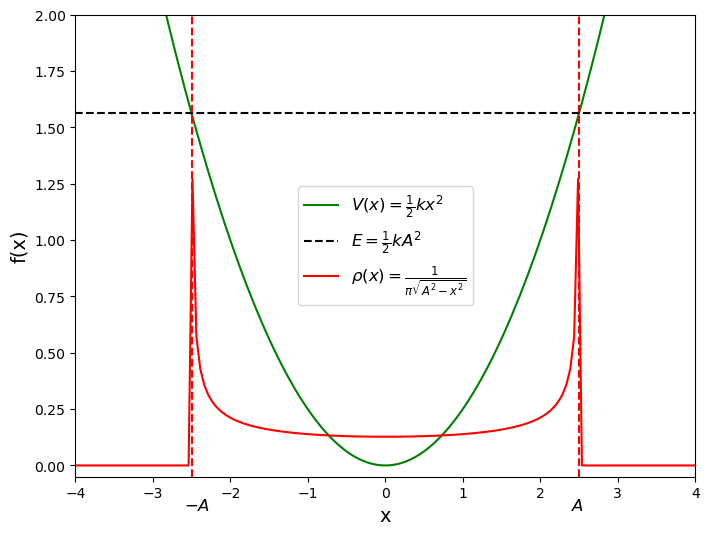

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 0.5
A = 2.5
E = 0.5 * k * A**2

# Define functions
def v(x):
    return 0.5 * k * x**2

def rho(x):
    return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Green curve for v(x)
x = np.linspace(-2*A, 2*A, 200)
y = v(x)
ax.plot(x, y, 'g-', label=r'$V(x)=\frac{1}{2}kx^2$')

# Dotted horizontal line for E
ax.axhline(y=E, color='k', linestyle='--', label=r'$E = \frac{1}{2}kA^2$')

# Horizontal lines for x=-A and x=A
ax.axvline(x=-A, color='r', linestyle='--')
ax.axvline(x=A, color='r', linestyle='--')
ax.text(-A-0.1, -0.2, r'$-A$', fontsize=12)
ax.text(A-0.1, -0.2, r'$A$', fontsize=12)

# Blue curve for rho(x)
y = rho(x)
ax.plot(x, y, 'r-', label=r'$\rho(x)=\frac{1}{\pi \sqrt{A^2-x^2}}$')

# Formatting
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('f(x)', fontsize=14)
ax.set_ylim([-0.05, 2])
ax.set_xlim([-4, 4])
ax.legend(fontsize=12)
plt.savefig('1_11_1.png')

plt.show()


C:\Users\gbert\AppData\Local\Temp\ipykernel_24668\3504651771.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)


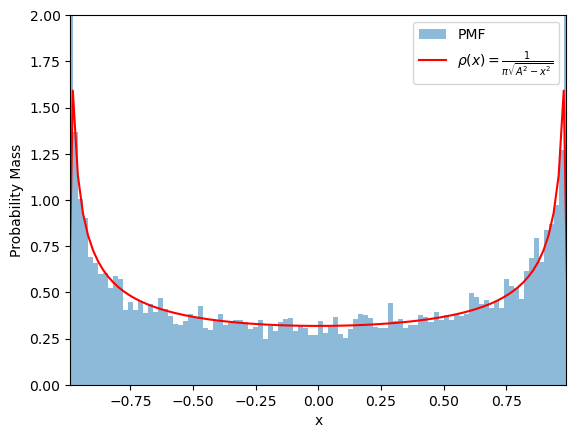

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Set A = 1, w = 1 and generate 10,000 random samples of x(t)
A = 1
w = 1

# Define x(t)
def x(t):
    return np.cos(w*t)

# Define ρ(x)
def rho(x):
    return np.where((x > -A) & (x < A), 1/(np.pi*np.sqrt(A**2-x**2)), 0)


snapshots = [x(np.pi*random.uniform(-1, 1)) for j in range(10000)]

# Plot histogram of samples with PDF
fig, ax = plt.subplots()
ax.hist(snapshots, bins=100, density=True, label='PMF', alpha=0.5)

# Plot ρ(x) on top of histogram
x_vals = np.linspace(-1, 1, 100)
y_vals = rho(x_vals)
ax.plot(x_vals, y_vals, label=r'$\rho(x)=\frac{1}{\pi \sqrt{A^2-x^2}}$', c='r')

# Add labels and legend
ax.set_xlabel('x')
ax.set_xlim([-.99,.99])
ax.set_ylim([0,2])
ax.set_ylabel('Probability Mass')
ax.legend()
plt.savefig('1_13_1.png')
plt.show()
